In [1]:
import pandas as pd
import matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = '/Users/debbiesubocz/GitReps/data516project/516project.csv'
data = pd.read_csv(file_path)

print(data.columns)
print(data.head(5))

Index(['Postgres Comments', 'Query Number', 'Number of Joins', 'Query Run',
       'Cold Postgres', 'Cold Postgres UOM', 'Warm Postgres',
       'Warm Postgres UOM', 'Cold Redshift', 'Cold Redshift UOM',
       'Warm Redshift', 'Warm Redshift UOM', 'Cold Postgres (sec)',
       'Warm Postgres (sec)', 'Cold Redshift (sec)', 'Warm Redshift (sec)'],
      dtype='object')
  Postgres Comments  Query Number  Number of Joins Query Run  Cold Postgres  \
0               NaN             1                5        1b          1.300   
1               NaN             2                5        2a          1.452   
2               NaN             3                4        3a         10.112   
3               NaN             4                5        4a          0.872   
4        no results             5                5        5a          0.506   

  Cold Postgres UOM  Warm Postgres Warm Postgres UOM  Cold Redshift  \
0               sec        827.000                ms              8   
1           

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the data from the Excel file
file_path = '/Users/debbiesubocz/GitReps/data516project/516project.csv'
data = pd.read_csv(file_path)

# Clean the data
# data.columns = data.iloc[0]  # Set the first row as header
# data = data[1:]  # Drop the first row now that the header is set
# data = data.dropna(axis=1, how='all')  # Drop columns with all NaN values
data['Query Number'] = data['Query Number'].astype(int)  # Ensure 'Query Number' is integer for plotting

# Convert time values to seconds if they are in milliseconds
# for col in ['Cold Postgres', 'Warm Postgres', 'Cold Redshift', 'Warm Redshift']:
#     data[col] = data[col].apply(lambda x: float(x) if isinstance(x, (int, float)) else (float(x[:-2]) / 1000))

print(data['Warm Postgres (sec)'])


0      0.827
1      1.426
2      5.250
3      0.977
4      0.471
5     16.355
6     17.698
7     12.807
8     10.500
9      5.730
10     0.250
11     9.499
12    10.634
13     7.814
14     2.981
15    12.144
16    21.129
17    20.670
18    21.648
19    20.683
20     0.257
21    13.455
22    73.000
23    19.150
24    17.938
25    19.360
26     0.331
27     7.673
28    23.201
29    18.443
30    19.492
31     0.502
32     1.340
Name: Warm Postgres (sec), dtype: float64


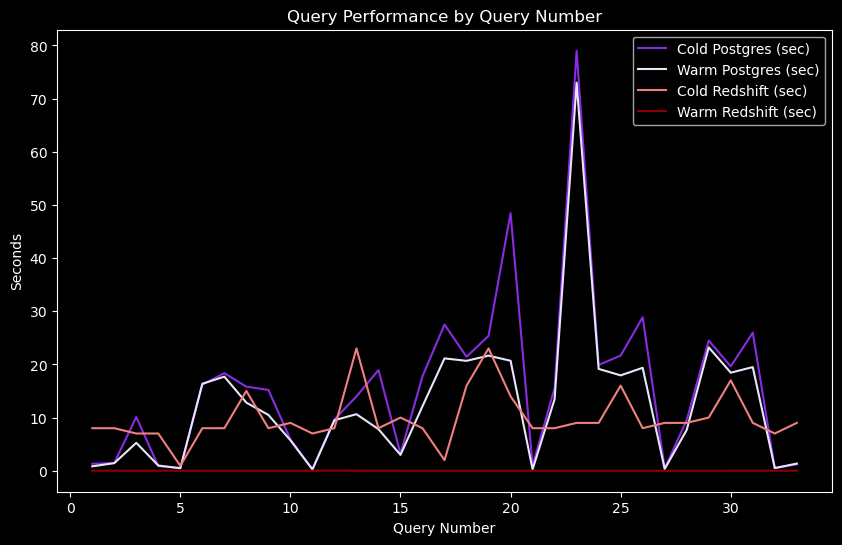

In [26]:
plt.style.use('dark_background')

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(data['Query Number'], data['Cold Postgres (sec)'], label='Cold Postgres (sec)', color='blueviolet')
plt.plot(data['Query Number'], data['Warm Postgres (sec)'], label='Warm Postgres (sec)', color='lavender')
plt.plot(data['Query Number'], data['Cold Redshift (sec)'], label='Cold Redshift (sec)', color='lightcoral')
plt.plot(data['Query Number'], data['Warm Redshift (sec)'], label='Warm Redshift (sec)', color='darkred')

# Adding titles and labels
plt.title('Query Performance by Query Number')
plt.xlabel('Query Number')
plt.ylabel('Seconds')

# Add a legend
plt.legend()

# Show the grid
#plt.grid(True)

# To display the plot (omit this line if you do not want to display the graph)
plt.show()

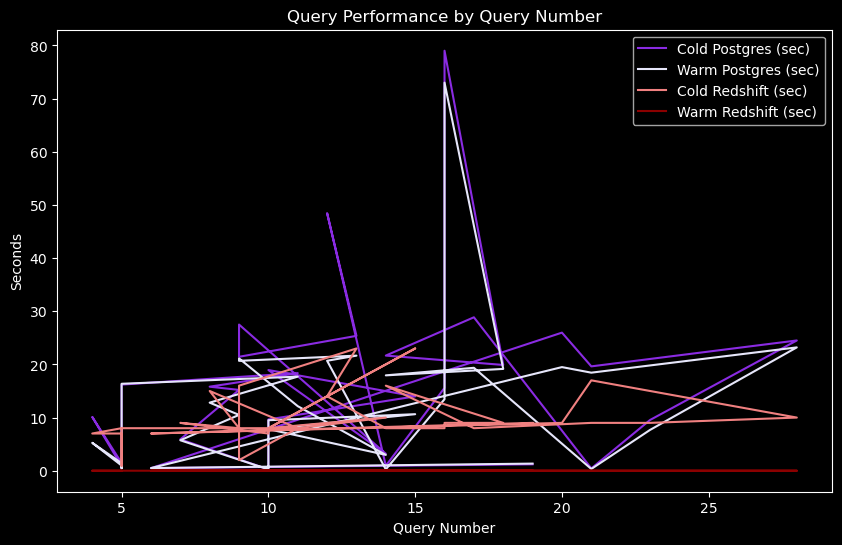

In [3]:
plt.style.use('dark_background')

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(data['Number of Joins'], data['Cold Postgres (sec)'], label='Cold Postgres (sec)', color='blueviolet')
plt.plot(data['Number of Joins'], data['Warm Postgres (sec)'], label='Warm Postgres (sec)', color='lavender')
plt.plot(data['Number of Joins'], data['Cold Redshift (sec)'], label='Cold Redshift (sec)', color='lightcoral')
plt.plot(data['Number of Joins'], data['Warm Redshift (sec)'], label='Warm Redshift (sec)', color='darkred')

# Adding titles and labels
plt.title('Query Performance by Query Number')
plt.xlabel('Query Number')
plt.ylabel('Seconds')

# Add a legend
plt.legend()

# Show the grid
#plt.grid(True)

# To display the plot (omit this line if you do not want to display the graph)
plt.show()

/var/folders/js/_m5r698x29j4dvr0w18h6jdm0000gn/T/ipykernel_16745/2705693812.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_times = data.groupby('Number of Joins').mean().reset_index()


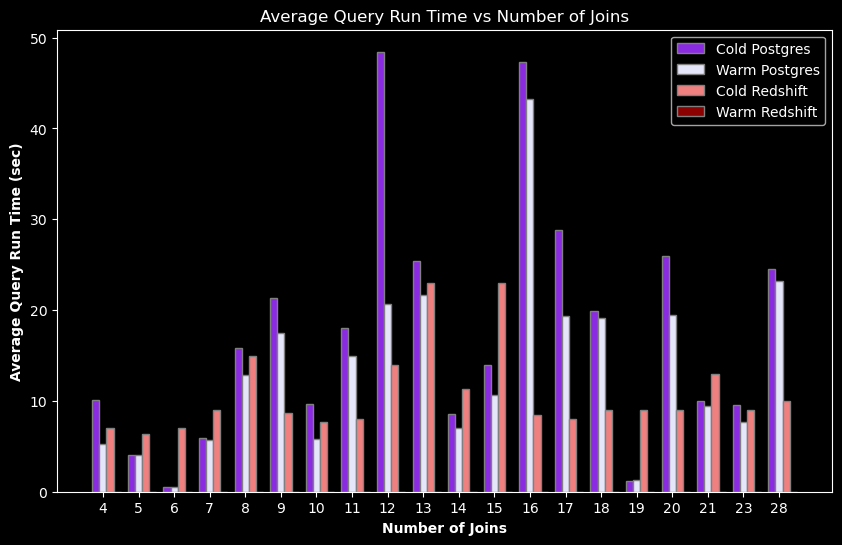

In [7]:
import numpy as np 

# Group by 'Number of Joins' and calculate mean
average_times = data.groupby('Number of Joins').mean().reset_index()

# Now 'average_times' contains the average run time for each 'Number of Joins'

# Define the width of the bars
bar_width = 0.2

# Set positions of the bars
r1 = np.arange(len(average_times['Number of Joins']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Use a dark background style
plt.style.use('dark_background')

# Create the bar chart
plt.figure(figsize=(10, 6))

plt.bar(r1, average_times['Cold Postgres (sec)'], color='blueviolet', width=bar_width, edgecolor='grey', label='Cold Postgres')
plt.bar(r2, average_times['Warm Postgres (sec)'], color='lavender', width=bar_width, edgecolor='grey', label='Warm Postgres')
plt.bar(r3, average_times['Cold Redshift (sec)'], color='lightcoral', width=bar_width, edgecolor='grey', label='Cold Redshift')
plt.bar(r4, average_times['Warm Redshift (sec)'], color='darkred', width=bar_width, edgecolor='grey', label='Warm Redshift')

# Add titles and labels
plt.xlabel('Number of Joins', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(average_times['Number of Joins']))], average_times['Number of Joins'])
plt.ylabel('Average Query Run Time (sec)', fontweight='bold')
plt.title('Average Query Run Time vs Number of Joins')

# Create legend & Show graphic
plt.legend()
plt.show()

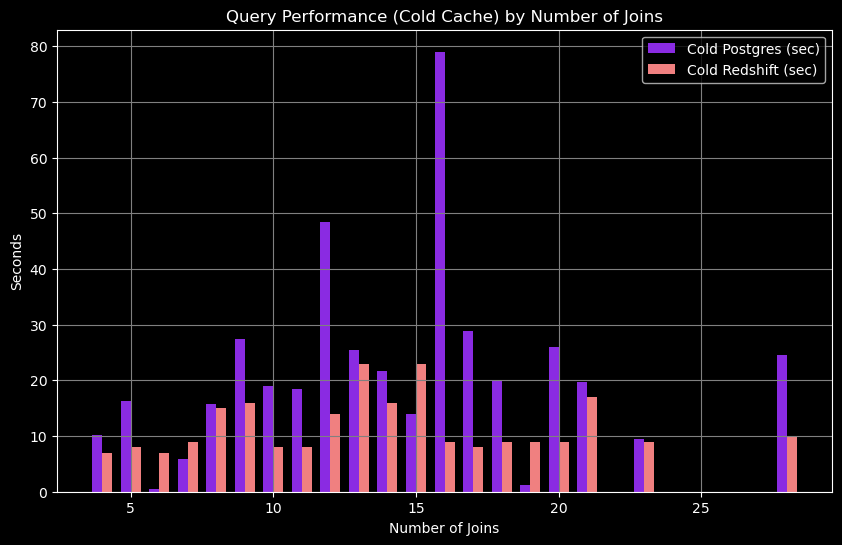

In [28]:
# Change the line chart to a bar chart
plt.style.use('dark_background')

# Plotting the bar chart
plt.figure(figsize=(10, 6))
width = 0.35  # the width of the bars

# Creating bar chart
bars1 = plt.bar(data['Number of Joins'] - width/2, data['Cold Postgres (sec)'], width, label='Cold Postgres (sec)', color='blueviolet')
bars2 = plt.bar(data['Number of Joins'] + width/2, data['Cold Redshift (sec)'], width, label='Cold Redshift (sec)', color='lightcoral')

# Adding titles and labels
plt.title('Query Performance (Cold Cache) by Number of Joins')
plt.xlabel('Number of Joins')
plt.ylabel('Seconds')

# Add a legend
plt.legend()

# Show the grid
plt.grid(True, color='gray')

# Display the plot
plt.show()